In [235]:
clear

In [1]:
import os
os.chdir("D:\谷歌下载\GiveMeSomeCredit")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #导入图像库

In [3]:
data=pd.read_csv("cs-training.csv")

In [4]:
data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [5]:
data.describe().to_csv('DataDescribe1.csv')  # 了解数据集的分布情况

In [5]:
# Missvalue.py
# 数据预处理1：  随机森林处理缺失值。
import pandas as pd
import matplotlib.pyplot as plt #导入图像库
from sklearn.ensemble import RandomForestRegressor
 
# 用随机森林对缺失值预测填充函数
def set_missing(df):
    # 把已有的数值型特征取出来
    process_df = df.iloc[:,[5,0,1,2,3,4,6,7,8,9]]
    # 分成已知该特征和未知该特征两部分
    known = np.array(process_df[process_df.MonthlyIncome.notnull()])
    unknown =np.array( process_df[process_df.MonthlyIncome.isnull()])
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200,max_depth=3)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    unknown=pd.DataFrame(unknown)
    unknown=unknown.fillna(value=pd.DataFrame(known).mean())
    unknown=np.array(unknown)
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print(predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.MonthlyIncome.isnull()), 'MonthlyIncome'] = predicted
    return df

In [6]:
if __name__ == '__main__':
       # 数据集缺失和分布情况
    data=set_missing(data)  # 用随机森林填补比较多的缺失值
    data=data.dropna()  # 删除比较少的缺失值
    data = data.drop_duplicates()  # 删除重复项
    data.to_csv('MissingData.csv', index=False)
    data.describe().to_csv('MissingDataDescribe.csv')

[0. 0. 0. ... 1. 1. 1.]


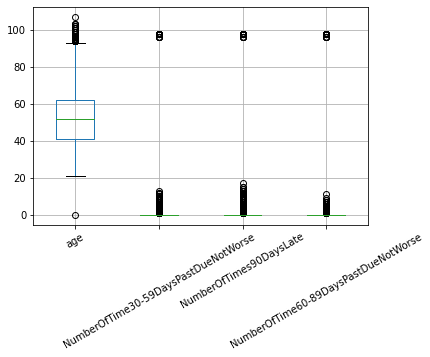

In [7]:
# 箱形图
data379=data[["age",'NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']]
data379.boxplot(labels=["age",'NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'])
plt.xticks(rotation=30)
plt.show()

In [8]:
if __name__ == '__main__':
    # 年龄等于0的异常值进行剔除
    data = data[data['age'] > 0]
    data = data[data['NumberOfTime30-59DaysPastDueNotWorse'] < 90] # 剔除异常值
    Y = 1-data['SeriousDlqin2yrs']
    X = data.iloc[:, 2:]

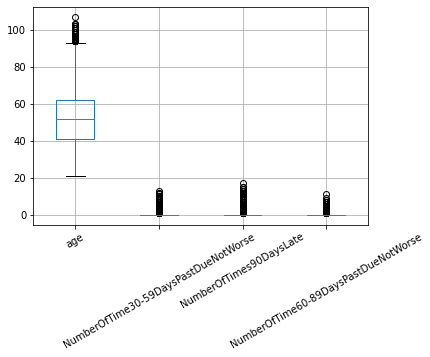

In [9]:
data379 = data[["age",'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']]
data379.boxplot()
plt.xticks(rotation=30)
plt.show()
data.to_csv('PretreatmentData.csv') 

In [10]:
import sklearn 
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(Y_train)
train = pd.concat([Y_train, X_train], axis=1)#concat是合并函数
test = pd.concat([Y_test, X_test], axis=1)

11225     1
72603     1
145581    1
84443     1
70926     1
         ..
43226     1
100433    1
98687     1
121319    1
44837     1
Name: SeriousDlqin2yrs, Length: 102085, dtype: int64


In [12]:
train.to_csv('TrainData.csv',index=False)
test.to_csv('TestData.csv',index=False)
print(train.shape)
print(test.shape)

(102085, 11)
(43752, 11)


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43752 entries, 55947 to 81365
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      43752 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  43752 non-null  float64
 2   age                                   43752 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  43752 non-null  int64  
 4   DebtRatio                             43752 non-null  float64
 5   MonthlyIncome                         43752 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       43752 non-null  int64  
 7   NumberOfTimes90DaysLate               43752 non-null  int64  
 8   NumberRealEstateLoansOrLines          43752 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  43752 non-null  int64  
 10  NumberOfDependents                    43752 non-null  float64
dtypes: float64(

(0.0, 10000.0)

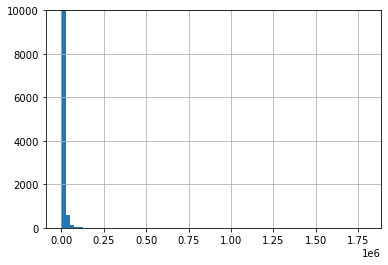

In [15]:
train["MonthlyIncome"].hist(bins=70)
plt.ylim(0,10000)

In [ ]:
train["DebtRatio"].hist(bins=600000)
plt.xlim(0,10)

(0.0, 10.0)

(0.0, 100.0)

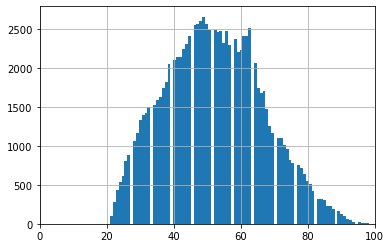

In [22]:
train["age"].hist(bins=100)
plt.xlim(0,100)

In [14]:
data=data.iloc[:,1:]

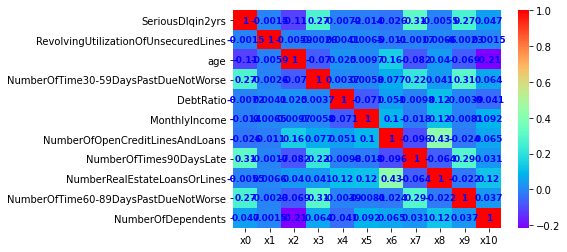

In [15]:
# part
import seaborn as sns
corr = data.corr()#计算各变量的相关性系数
xticks = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']#x轴标签
yticks = list(corr.index)#y轴标签
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap='rainbow', ax=ax1, annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'})#绘制相关性系数热力图
ax1.set_xticklabels(xticks, rotation=0, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

In [16]:
# part
# 定义自动分箱函数
import scipy
def mono_bin1(Y, X, n = 20):
    r = 0
    good=Y.sum()
    bad=Y.count()-good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n,duplicates='drop')})
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = scipy.stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
    d3['min']=d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe']=np.log((d3['rate']/(1-d3['rate']))/(good/bad))
    d3['goodattribute']=d3['sum']/good
    d3['badattribute']=(d3['total']-d3['sum'])/bad
    iv=((d3['goodattribute']-d3['badattribute'])*d3['woe']).sum()
    d4 = (d3.sort_index()).reset_index(drop=True)
    print("=" * 60)
    print(d4)
    cut=[]
    cut.append(float('-inf'))
    for i in range(1,n+1):
        qua=X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe=list(d4['woe'].round(3))
    return d4,iv,cut,woe

In [17]:
def self_bin(Y,X,cat):
    good=Y.sum()
    bad=Y.count()-good
    d1=pd.DataFrame({'X':X,'Y':Y,'Bucket':pd.cut(X,cat)})
    d2=d1.groupby('Bucket', as_index = True)
    d3 = pd.DataFrame(d2.X.min(), columns=['min'])
    d3['min'] = d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1 - d3['rate'])) / (good / bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_index())
    print("=" * 60)
    print(d4)
    woe = list(d4['woe'].round(3))
    return d4, iv,woe

In [18]:
if __name__ == '__main__':
    data = pd.read_csv('TrainData.csv')
    pinf = float('inf')  # 正无穷大
    ninf = float('-inf')  # 负无穷大
    dfx1, ivx1,cutx1,woex1=mono_bin1(data.SeriousDlqin2yrs,data.RevolvingUtilizationOfUnsecuredLines,n=10)
    dfx2, ivx2,cutx2,woex2=mono_bin1(data.SeriousDlqin2yrs, data.age, n=10)
    dfx4, ivx4,cutx4,woex4 =mono_bin1(data.SeriousDlqin2yrs, data.DebtRatio, n=20)
    dfx5, ivx5,cutx5,woex5 =mono_bin1(data.SeriousDlqin2yrs, data.MonthlyIncome, n=10)
    # 连续变量离散化
    cutx3 = [ninf, 0, 1, 3, 5, pinf]
    cutx6 = [ninf, 1, 2, 3, 5, pinf]
    cutx7 = [ninf, 0, 1, 3, 5, pinf]
    cutx8 = [ninf, 0,1,2, 3, pinf]
    cutx9 = [ninf, 0, 1, 3, pinf]
    cutx10 = [ninf, 0, 1, 2, 3, 5, pinf]

        min           max    sum  total      rate       woe  goodattribute  \
0  0.000000      0.030932  25057  25522  0.981780  1.343766       0.262914   
1  0.030940      0.159742  25023  25521  0.980487  1.273845       0.262557   
2  0.159744      0.560195  24182  25521  0.947533  0.250580       0.253733   
3  0.560236  29110.000000  21043  25521  0.824537 -1.095714       0.220796   

   badattribute  
0      0.068584  
1      0.073451  
2      0.197493  
3      0.660472  
   min  max    sum  total      rate       woe  goodattribute  badattribute
0   21   33  10285  11559  0.889783 -0.554580       0.107917      0.187906
1   34   40  11318  12486  0.906455 -0.372004       0.118756      0.172271
2   41   45  10297  11255  0.914882 -0.268345       0.108043      0.141298
3   46   49   9564  10399  0.919704 -0.204776       0.100352      0.123156
4   50   54  11572  12496  0.926056 -0.115474       0.121421      0.136283
5   55   59  11037  11675  0.945353  0.207565       0.115807      0.0

             min  max    sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]    0    0  82390  85834  0.959876  0.531725       0.864488   
(0.0, 1.0]     1    1   9317  10974  0.849007 -0.916273       0.097760   
(1.0, 3.0]     2    3   3099   4359  0.710943 -1.743137       0.032517   
(3.0, 5.0]     4    5    417    749  0.556742 -2.415154       0.004375   
(5.0, inf]     6   13     82    169  0.485207 -2.702294       0.000860   

             badattribute  
Bucket                     
(-inf, 0.0]      0.507965  
(0.0, 1.0]       0.244395  
(1.0, 3.0]       0.185841  
(3.0, 5.0]       0.048968  
(5.0, inf]       0.012832  
             min  max    sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 1.0]    0    1   3373   3986  0.846212 -0.937912       0.035392   
(1.0, 2.0]     2    2   3972   4387  0.905402 -0.384359       0

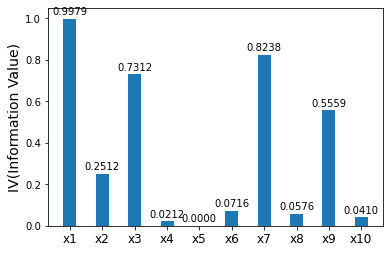

In [19]:
dfx3, ivx3,woex3 = self_bin(data.SeriousDlqin2yrs, data['NumberOfTime30-59DaysPastDueNotWorse'], cutx3)
dfx6, ivx6 ,woex6= self_bin(data.SeriousDlqin2yrs, data['NumberOfOpenCreditLinesAndLoans'], cutx6)
dfx7, ivx7,woex7 = self_bin(data.SeriousDlqin2yrs, data['NumberOfTimes90DaysLate'], cutx7)
dfx8, ivx8,woex8 = self_bin(data.SeriousDlqin2yrs, data['NumberRealEstateLoansOrLines'], cutx8)
dfx9, ivx9,woex9 = self_bin(data.SeriousDlqin2yrs, data['NumberOfTime60-89DaysPastDueNotWorse'], cutx9)
dfx10, ivx10,woex10 = self_bin(data.SeriousDlqin2yrs, data['NumberOfDependents'], cutx10)
ivlist=[ivx1,ivx2,ivx3,ivx4,ivx5,ivx6,ivx7,ivx8,ivx9,ivx10]
index=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index))+1
ax1.bar(x, ivlist, width=0.4)
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV(Information Value)', fontsize=14)
for a, b in zip(x, ivlist):
     plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)

In [20]:
#替换成woe函数
def replace_woe(series,cut,woe):
    list=[]
    i=0
    while i<len(series):
        value=series[i]
        j=len(cut)-2
        m=len(cut)-2
        while j>=0:
            if value>=cut[j]:
                j=-1
            else:
                j -=1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

In [21]:
# 训练集的替换成woe
data['RevolvingUtilizationOfUnsecuredLines'] = pd.Series(replace_woe(data['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
data['age'] = pd.Series(replace_woe(data['age'], cutx2, woex2))
data['NumberOfTime30-59DaysPastDueNotWorse'] = pd.Series(replace_woe(data['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
data['DebtRatio'] = pd.Series(replace_woe(data['DebtRatio'], cutx4, woex4))
data['MonthlyIncome'] = pd.Series(replace_woe(data['MonthlyIncome'], cutx5, woex5))
data['NumberOfOpenCreditLinesAndLoans'] = pd.Series(replace_woe(data['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
data['NumberOfTimes90DaysLate'] = pd.Series(replace_woe(data['NumberOfTimes90DaysLate'], cutx7, woex7))
data['NumberRealEstateLoansOrLines'] = pd.Series(replace_woe(data['NumberRealEstateLoansOrLines'], cutx8, woex8))
data['NumberOfTime60-89DaysPastDueNotWorse'] = pd.Series(replace_woe(data['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
data['NumberOfDependents'] = pd.Series(replace_woe(data['NumberOfDependents'], cutx10, woex10))
data.to_csv('WoeData.csv', index=False)

In [22]:
# 测试集分箱
if __name__ == '__main__':
    test = pd.read_csv('TestData.csv')
    pinf = float('inf')  # 正无穷大
    ninf = float('-inf')  # 负无穷大
    tdfx1, tivx1,tcutx1,twoex1=mono_bin1(test.SeriousDlqin2yrs,test.RevolvingUtilizationOfUnsecuredLines,n=10)
    tdfx2, tivx2,tcutx2,twoex2=mono_bin1(test.SeriousDlqin2yrs, test.age, n=10)
    tdfx4, tivx4,tcutx4,twoex4 =mono_bin1(test.SeriousDlqin2yrs, test.DebtRatio, n=20)
    tdfx5, tivx5,tcutx5,twoex5 =mono_bin1(test.SeriousDlqin2yrs, test.MonthlyIncome, n=10)
    # 连续变量离散化
    tcutx3 = [ninf, 0, 1, 3, 5, pinf]
    tcutx6 = [ninf, 1, 2, 3, 5, pinf]
    tcutx7 = [ninf, 0, 1, 3, 5, pinf]
    tcutx8 = [ninf, 0,1,2, 3, pinf]
    tcutx9 = [ninf, 0, 1, 3, pinf]
    tcutx10 = [ninf, 0, 1, 2, 3, 5, pinf]

        min           max    sum  total      rate       woe  goodattribute  \
0  0.000000      0.030897  10724  10938  0.980435  1.280776       0.262714   
1  0.030905      0.154505  10691  10938  0.977418  1.134282       0.261906   
2  0.154524      0.560065  10427  10938  0.953282  0.382297       0.255439   
3  0.560253  50708.000000   8978  10938  0.820808 -1.111655       0.219941   

   badattribute  
0      0.072988  
1      0.084243  
2      0.174284  
3      0.668486  
   min  max   sum  total      rate       woe  goodattribute  badattribute
0   21   33  4347   4891  0.888775 -0.555195       0.106492      0.185539
1   34   40  4783   5281  0.905700 -0.371264       0.117173      0.169850
2   41   45  4403   4805  0.916337 -0.239898       0.107864      0.137108
3   46   50  5132   5582  0.919384 -0.199484       0.125723      0.153479
4   51   54  3908   4206  0.929149 -0.059800       0.095737      0.101637
5   55   59  4754   5031  0.944941  0.209237       0.116463      0.094475
6

             min  max    sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]    0    0  35164  36669  0.958957  0.517743       0.861440   
(0.0, 1.0]     1    1   4064   4770  0.851992 -0.883180       0.099559   
(1.0, 3.0]     2    3   1368   1920  0.712500 -1.725930       0.033513   
(3.0, 5.0]     4    5    189    326  0.579755 -2.311721       0.004630   
(5.0, inf]     6   12     35     67  0.522388 -2.543875       0.000857   

             badattribute  
Bucket                     
(-inf, 0.0]      0.513302  
(0.0, 1.0]       0.240791  
(1.0, 3.0]       0.188267  
(3.0, 5.0]       0.046726  
(5.0, inf]       0.010914  
             min  max    sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 1.0]    0    1   1334   1611  0.828057 -1.061568       0.032680   
(1.0, 2.0]     2    2   1696   1866  0.908896 -0.333258       0

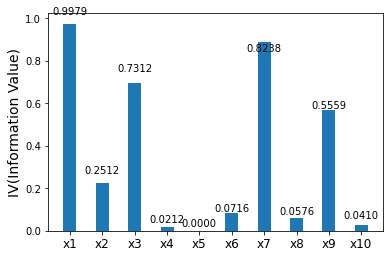

In [23]:
tdfx3, tivx3,twoex3 = self_bin(test.SeriousDlqin2yrs, test['NumberOfTime30-59DaysPastDueNotWorse'], tcutx3)
tdfx6, tivx6 ,twoex6= self_bin(test.SeriousDlqin2yrs, test['NumberOfOpenCreditLinesAndLoans'], tcutx6)
tdfx7, tivx7,twoex7 = self_bin(test.SeriousDlqin2yrs, test['NumberOfTimes90DaysLate'], tcutx7)
tdfx8, tivx8,twoex8 = self_bin(test.SeriousDlqin2yrs, test['NumberRealEstateLoansOrLines'], tcutx8)
tdfx9, tivx9,twoex9 = self_bin(test.SeriousDlqin2yrs, test['NumberOfTime60-89DaysPastDueNotWorse'], tcutx9)
tdfx10, tivx10,twoex10 = self_bin(test.SeriousDlqin2yrs,test['NumberOfDependents'], tcutx10)
tivlist=[tivx1,tivx2,tivx3,tivx4,tivx5,tivx6,tivx7,tivx8,tivx9,tivx10]
index=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index))+1
ax1.bar(x, tivlist, width=0.4)
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV(Information Value)', fontsize=14)
for a, b in zip(x, ivlist):
     plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)

In [24]:
#测试集的替换成woe
test['RevolvingUtilizationOfUnsecuredLines'] = pd.Series(replace_woe(test['RevolvingUtilizationOfUnsecuredLines'], tcutx1, twoex1))
test['age'] = pd.Series(replace_woe(test['age'], tcutx2, twoex2))
test['NumberOfTime30-59DaysPastDueNotWorse'] = pd.Series(replace_woe(test['NumberOfTime30-59DaysPastDueNotWorse'], tcutx3, twoex3))
test['DebtRatio'] = pd.Series(replace_woe(test['DebtRatio'], tcutx4, twoex4))
test['MonthlyIncome'] = pd.Series(replace_woe(test['MonthlyIncome'], tcutx5, twoex5))
test['NumberOfOpenCreditLinesAndLoans'] = pd.Series(replace_woe(test['NumberOfOpenCreditLinesAndLoans'], tcutx6, twoex6))
test['NumberOfTimes90DaysLate'] = pd.Series(replace_woe(test['NumberOfTimes90DaysLate'], tcutx7, twoex7))
test['NumberRealEstateLoansOrLines'] = pd.Series(replace_woe(test['NumberRealEstateLoansOrLines'], tcutx8, twoex8))
test['NumberOfTime60-89DaysPastDueNotWorse'] = pd.Series(replace_woe(test['NumberOfTime60-89DaysPastDueNotWorse'], tcutx9, twoex9))
test['NumberOfDependents'] = pd.Series(replace_woe(test['NumberOfDependents'], tcutx10, twoex10))
test.to_csv('TestWoeData.csv', index=False)

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
import matplotlib.pyplot as plt
import pandas as pd
from patsy import dmatrices
import itertools as it
import random

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43752 entries, 0 to 43751
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      43752 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  43752 non-null  float64
 2   age                                   43752 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  43752 non-null  float64
 4   DebtRatio                             43752 non-null  float64
 5   MonthlyIncome                         43752 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       43752 non-null  float64
 7   NumberOfTimes90DaysLate               43752 non-null  float64
 8   NumberRealEstateLoansOrLines          43752 non-null  float64
 9   NumberOfTime60-89DaysPastDueNotWorse  43752 non-null  float64
 10  NumberOfDependents                    43752 non-null  float64
dtypes: float64(10),

In [27]:
#机器学习
data = pd.read_csv('WoeData.csv')

df=data.drop(['DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
df.rename(columns={'NumberOfTime30-59DaysPastDueNotWorse':'NumberOfTimedays3059PastDueNotWorse'},inplace=True)
df.rename(columns={'NumberOfTime60-89DaysPastDueNotWorse':'NumberOfTimedays6089PastDueNotWorse'},inplace=True)
df.rename(columns={'SeriousDlqin2yrs':'y'},inplace=True)
#应变量
Y=df["y"]
#自变量，剔除对因变量影响不明显的变量
X=df.drop(['y'],axis=1)
X1=sm.add_constant(X)
logit1=sm.Logit(np.array(Y),np.array(X))
result1=logit1.fit()
print(result1.summary())
logit1.fit().aic#获取随机函数的AIC值

Optimization terminated successfully.
         Current function value: 0.224201
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               102085
Model:                          Logit   Df Residuals:                   102080
Method:                           MLE   Df Model:                            4
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                 0.08214
Time:                        18:56:36   Log-Likelihood:                -22888.
converged:                       True   LL-Null:                       -24936.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8644      0.014     62.920      0.000       0.837       0.891
x2             0.5436      0.

45785.182483817036

In [28]:
X_train=np.array(df.loc[:,["NumberOfTimedays3059PastDueNotWorse","age","NumberOfTimedays6089PastDueNotWorse","RevolvingUtilizationOfUnsecuredLines","NumberOfTimes90DaysLate"]])
Y_train=np.array(df["y"])
lr=sm.Logit(Y_train,X_train)
print(lr.fit().summary())

Optimization terminated successfully.
         Current function value: 0.224201
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               102085
Model:                          Logit   Df Residuals:                   102080
Method:                           MLE   Df Model:                            4
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                 0.08214
Time:                        18:56:37   Log-Likelihood:                -22888.
converged:                       True   LL-Null:                       -24936.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0329      0.028     36.530      0.000       0.977       1.088
x2             0.5436      0.

Optimization terminated successfully.
         Current function value: 0.224201
         Iterations 8


D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20551 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20551 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anconda\lib\site-packages\matplotli

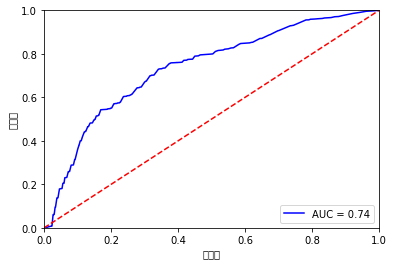

In [29]:
from sklearn.metrics import roc_curve, auc
resu = lr.fit().predict(X_train)

#进行预测
fpr, tpr, threshold = roc_curve(Y_train, resu)
rocauc = auc(fpr, tpr)#计算AUC
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % rocauc)#生成ROC曲线
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真正率')
plt.xlabel('假正率')
plt.show()

In [30]:
df1=pd.read_csv('TestWoeData.csv')

In [31]:
df1.rename(columns={'NumberOfTime30-59DaysPastDueNotWorse':'NumberOfTimedays3059PastDueNotWorse'},inplace=True)
df1.rename(columns={'NumberOfTime60-89DaysPastDueNotWorse':'NumberOfTimedays6089PastDueNotWorse'},inplace=True)

In [32]:
df1

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTimedays3059PastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTimedays6089PastDueNotWorse,NumberOfDependents
0,1,1.281,0.209,-0.883,0.146,0.0,-0.001,-2.039,0.259,-1.875,-0.038
1,1,0.382,0.842,-0.883,0.043,0.0,0.129,-2.039,0.156,-1.875,-0.145
2,1,1.134,-0.555,-0.883,0.146,0.0,0.129,-2.039,0.259,-1.875,-0.342
3,1,-1.112,-0.240,-1.726,0.146,0.0,-1.062,-2.039,0.259,-1.875,-0.440
4,1,0.382,-0.060,-0.883,-0.167,0.0,0.129,-2.039,0.156,-1.875,-0.145
...,...,...,...,...,...,...,...,...,...,...,...
43747,1,1.134,0.458,-0.883,-0.167,0.0,0.129,-2.039,0.259,-1.875,-0.038
43748,1,1.281,0.842,-0.883,0.146,0.0,-0.001,-2.039,0.034,-1.875,-0.145
43749,1,-1.112,-0.199,-0.883,0.146,0.0,-0.001,-2.039,0.156,-1.875,-0.038
43750,1,1.134,-0.240,-0.883,-0.167,0.0,0.129,-2.039,0.034,-1.875,-0.342


In [33]:
X_test=np.array(df1.loc[:,["NumberOfTimedays3059PastDueNotWorse","age","NumberOfTimedays6089PastDueNotWorse","RevolvingUtilizationOfUnsecuredLines","NumberOfTimes90DaysLate"]])
Y_test=np.array(df1["SeriousDlqin2yrs"])
lr1=sm.Logit(Y_test,X_test)
print(lr1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.223405
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                43752
Model:                          Logit   Df Residuals:                    43747
Method:                           MLE   Df Model:                            4
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                 0.09128
Time:                        18:56:38   Log-Likelihood:                -9774.4
converged:                       True   LL-Null:                       -10756.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0282      0.044     23.625      0.000       0.943       1.113
x2             0.5116      0.

Optimization terminated successfully.
         Current function value: 0.223405
         Iterations 8


D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20551 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20551 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anconda\lib\site-packages\matplotli

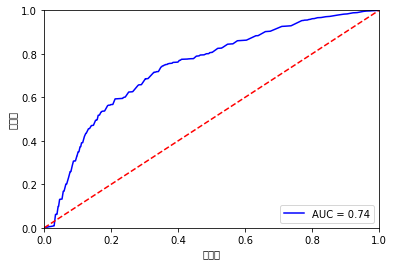

In [34]:
from sklearn.metrics import roc_curve, auc
resu1 = lr1.fit().predict(X_test)#进行预测

fpr1, tpr1, threshold1 = roc_curve(Y_test, resu1)
rocauc1 = auc(fpr1, tpr1)#计算AUC
plt.plot(fpr1, tpr1, 'b', label='AUC = %0.2f' % rocauc1)#生成ROC曲线
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真正率')
plt.xlabel('假正率')
plt.show()

In [48]:
#随机森林挑选变量
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('WoeData.csv')
y = data['SeriousDlqin2yrs']
x = data.drop('SeriousDlqin2yrs', axis=1)
clf = RandomForestClassifier()
clf.fit(x, y)

RandomForestClassifier()

In [49]:
#随机森林挑选变量
importance = clf.feature_importances_
indices = np.argsort(importance)[::-1]
features = x.columns
for f in range(x.shape[1]):
    print(("%2d) %-*s %f" % (f + 1, 30, features[f], importance[indices[f]])))

 1) RevolvingUtilizationOfUnsecuredLines 0.198039
 2) age                            0.176896
 3) NumberOfTime30-59DaysPastDueNotWorse 0.111758
 4) DebtRatio                      0.103155
 5) MonthlyIncome                  0.099044
 6) NumberOfOpenCreditLinesAndLoans 0.093853
 7) NumberOfTimes90DaysLate        0.081015
 8) NumberRealEstateLoansOrLines   0.073399
 9) NumberOfTime60-89DaysPastDueNotWorse 0.062841
10) NumberOfDependents             0.000000


Text(0.5, 1.0, 'Variable Importances')

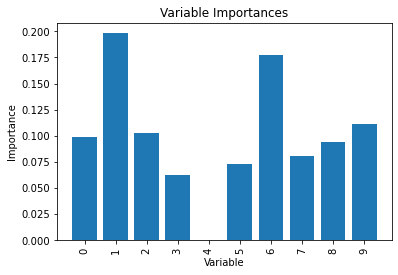

In [53]:
# Calculate the importance of variables

random_forest_importance=list(importance)
random_forest_feature_importance=sorted(random_forest_importance,reverse=True)
plt.figure(3)
plt.clf()
importance_plot_x_values=list(range(len(random_forest_importance)))
plt.bar(importance_plot_x_values,random_forest_importance,orientation='vertical')
plt.xticks(importance_plot_x_values,rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importances')

In [54]:
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,-1.096,-0.205,-1.743,-0.191,-0.0,-0.384,-1.935,0.235,-1.815,-0.125
1,1,1.344,0.915,-0.916,0.134,-0.0,0.037,-1.935,0.197,-1.815,-0.125
2,1,0.251,0.459,-0.916,0.134,-0.0,0.122,-1.935,0.235,-1.815,-0.230
3,1,0.251,0.459,-0.916,-0.191,-0.0,0.122,-1.935,-0.025,-1.815,-0.283
4,1,1.274,0.915,-0.916,0.085,-0.0,0.122,-1.935,-0.025,-1.815,-0.125
...,...,...,...,...,...,...,...,...,...,...,...
102080,1,-1.096,-0.205,-0.916,0.085,-0.0,0.122,-1.935,-0.588,-1.815,-0.283
102081,1,1.274,-0.268,-0.916,0.085,-0.0,0.122,-1.935,-0.025,-1.815,-0.230
102082,1,1.274,1.137,-0.916,-0.191,-0.0,0.122,-1.935,-0.588,-1.815,-0.230
102083,1,1.344,0.915,-0.916,0.134,-0.0,0.122,-1.935,0.235,-1.815,-0.230


In [57]:
data = pd.read_csv('WoeData.csv')
df3=data.drop(['DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse'],axis=1)
df3.rename(columns={'NumberOfTime30-59DaysPastDueNotWorse':'NumberOfTimedays3059PastDueNotWorse'},inplace=True)

In [58]:
df3.rename(columns={'SeriousDlqin2yrs':'y'},inplace=True)
#应变量
Y3=df3["y"]
#自变量，剔除对因变量影响不明显的变量
X3=df3.drop(['y'],axis=1)
X33=sm.add_constant(X)
logit3=sm.Logit(np.array(Y3),np.array(X33))
result3=logit3.fit()
print(result3.summary())
logit3.fit().aic#获取随机函数的AIC值

Optimization terminated successfully.
         Current function value: 0.185542
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               102085
Model:                          Logit   Df Residuals:                   102079
Method:                           MLE   Df Model:                            5
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                  0.2404
Time:                        20:37:22   Log-Likelihood:                -18941.
converged:                       True   LL-Null:                       -24936.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2771      0.106     87.136      0.000       9.068       9.486
x1             0.6494      0.

37894.06468262253

Optimization terminated successfully.
         Current function value: 0.185542
         Iterations 8


D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20551 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20551 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anconda\lib\site-packages\matplotli

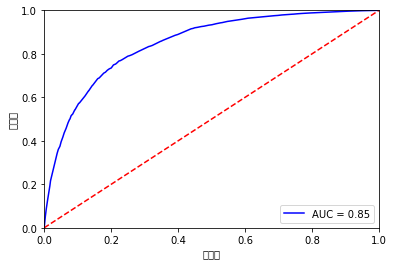

In [60]:
from sklearn.metrics import roc_curve, auc
resu3 = logit3.fit().predict(X33)#进行预测

fpr3, tpr3, threshold3 = roc_curve(Y3, resu3)
rocauc3 = auc(fpr3, tpr3)#计算AUC
plt.plot(fpr3, tpr3, 'b', label='AUC = %0.2f' % rocauc3)#生成ROC曲线
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真正率')
plt.xlabel('假正率')
plt.show()

In [61]:
df4=pd.read_csv('TestWoeData.csv')
df4=data.drop(['DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse'],axis=1)
df4.rename(columns={'NumberOfTime30-59DaysPastDueNotWorse':'NumberOfTimedays3059PastDueNotWorse'},inplace=True)
df4.rename(columns={'SeriousDlqin2yrs':'y'},inplace=True)
#应变量
Y4=df4["y"]
#自变量，剔除对因变量影响不明显的变量
X4=df4.drop(['y'],axis=1)
X44=sm.add_constant(X4)
logit4=sm.Logit(np.array(Y4),np.array(X44))
result4=logit4.fit()
print(result4.summary())
logit4.fit().aic#获取随机函数的AIC值

Optimization terminated successfully.
         Current function value: 0.188197
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               102085
Model:                          Logit   Df Residuals:                   102079
Method:                           MLE   Df Model:                            5
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                  0.2295
Time:                        20:46:07   Log-Likelihood:                -19212.
converged:                       True   LL-Null:                       -24936.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9712      0.090     88.686      0.000       7.795       8.147
x1             0.6727      0.

38436.20521519526

Optimization terminated successfully.
         Current function value: 0.188197
         Iterations 8


D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20551 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20551 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anconda\lib\site-packages\matplotli

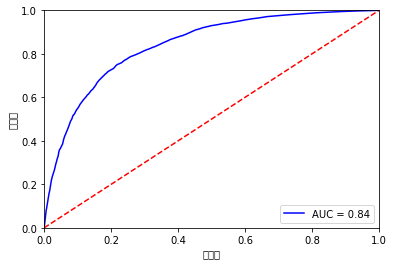

In [62]:
from sklearn.metrics import roc_curve, auc
resu4 = logit4.fit().predict(X44)#进行预测

fpr4, tpr4, threshold4= roc_curve(Y4, resu4)
rocauc4 = auc(fpr4, tpr4)#计算AUC
plt.plot(fpr4, tpr4, 'b', label='AUC = %0.2f' % rocauc4)#生成ROC曲线
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真正率')
plt.xlabel('假正率')
plt.show()

In [68]:
B = 20/np.log(2) 
A = 600 + B*np.log(1/60) 
B,A

# 计算基础分
base_score = A-B*7.9712  
base_score

251.86197388914752

In [66]:
print(result4.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               102085
Model:                          Logit   Df Residuals:                   102079
Method:                           MLE   Df Model:                            5
Date:                Fri, 24 Jun 2022   Pseudo R-squ.:                  0.2295
Time:                        20:54:29   Log-Likelihood:                -19212.
converged:                       True   LL-Null:                       -24936.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9712      0.090     88.686      0.000       7.795       8.147
x1             0.6727      0.015     43.802      0.000       0.643       0.703
x2             0.4991      0.031     15.998      0.0

In [69]:
coef=[0.6727,0.4991,1.1989,1.8860,0.2576]

In [70]:
data=pd.read_csv("TestWoeData.csv")
dat=data.loc[:,['NumberOfTime30-59DaysPastDueNotWorse', 'age', 'NumberOfDependents', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate']]

file = "ScoreData.csv"
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中

with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(dat.columns):
    for j in range(0,len(dat["age"])):
        score = dat.loc[[j],[col]] * (-B*coef[i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")